<a href="https://colab.research.google.com/github/Abhishek1236/deep-learning-model/blob/master/combination_of_ann_and_som.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

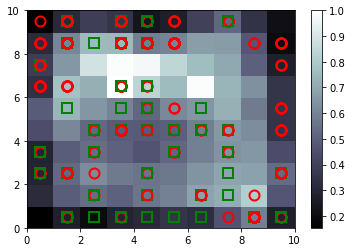

In [1]:
#hybrid deep learning model
# part -1 identify the fraud using som 
#importing the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
#importing the dataset
dataset = pd.read_csv('/content/Credit_Card_Applications.csv')

x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

#feature scaling 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range= (0,1))
x = sc.fit_transform(x)

from minisom import MiniSom

#Training the Som
som = MiniSom(x = 10,y = 10,input_len =15,sigma = 1.0,learning_rate = 0.5)


#initializing the weights
som.random_weights_init(x)
som.train_random(x,num_iteration=100)

#visualizing the reault
from pylab import bone, pcolor,colorbar,plot,show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o','s']
colors = ['r','g']
for i, x in enumerate(x):
  w = som.winner(x)
  plot(w[0]+0.5,
       w[1]+0.5,
       markers[y[i]],
       markeredgecolor = colors[y[i]],
       markerfacecolor = 'None',
       markersize = 10,
       markeredgewidth = 2)
show()



In [0]:
#finding the frauds 
mapping = som.win_map(x)
frauds = np.concatenate((mapping[(8,1)] ,mapping[(8,0)]),axis = 0)
frauds = sc.inverse_transform(frauds)

In [6]:
frauds.shape

(49, 15)

In [0]:
# going from unsupervised to supervised
#creating the matrix of features 
customers = dataset.iloc[:,1:].values



In [10]:
customers.shape

(690, 15)

In [0]:
#creating the dependent variables 
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

In [12]:
#ann 
#feature scaling
from sklearn.preprocessing import  StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

import keras 
from keras.models import Sequential
from keras.layers import Dense
#from keras.layers import Dropout

#intializing our neural network with dropout
classifier  = Sequential()
classifier.add(Dense(units = 2,kernel_initializer= 'uniform',activation = 'relu',input_dim = 15))
classifier.add(Dense(units = 1, kernel_initializer= 'uniform',activation = 'sigmoid'))

#compiling the model 
classifier.compile(optimizer= 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

#fitting the model 
classifier.fit(customers,is_fraud,batch_size=1,epochs = 5)


Using TensorFlow backend.


Epoch 1/5
690/690 [==============================] - 1s 1ms/step - loss: 0.4803 - accuracy: 0.9290
Epoch 2/5
690/690 [==============================] - 1s 1ms/step - loss: 0.2032 - accuracy: 0.9290
Epoch 3/5
690/690 [==============================] - 1s 1ms/step - loss: 0.1422 - accuracy: 0.9290
Epoch 4/5
690/690 [==============================] - 1s 1ms/step - loss: 0.1176 - accuracy: 0.9290
Epoch 5/5
690/690 [==============================] - 1s 1ms/step - loss: 0.1031 - accuracy: 0.9290


In [0]:
#prediction the probabilities of fraud
y_pred = classifier.predict(customers)

In [0]:
y_pred = np.concatenate((dataset.iloc[:,0:1].values,y_pred),axis = 1)

In [0]:
#sorting the customers 
y_pred = y_pred[y_pred[:,1].argsort()]

In [18]:
y_pred

array([[1.57170650e+07, 1.80929899e-04],
       [1.57238270e+07, 1.83433294e-04],
       [1.56674600e+07, 1.96337700e-04],
       ...,
       [1.56514600e+07, 3.79429728e-01],
       [1.56444530e+07, 3.79429728e-01],
       [1.56099870e+07, 3.79429728e-01]])